##Algorithme de régression en Machine Learning - DTS IMRT (S1, UE 3.1)

On étudie ici un exemple de modèle prédictif de régression. On étudie, à partir de données expérimentales, les conditions qui permettent d'optimiser l'effet radio-amplificateur des nanoparticules lors d'une irradiation pour un traitement en radiothérapie. Le modèle effectue une prédiction quantitative des paramètres alpha et bêta du modèle linéaire-quadratique, afin d'obtenir une courbe prédictive de la survie cellulaire en fonction de la dose d'irradiation.

In [ ]:
#Importation des bibliothèques nécessaires

#Import standard libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
from IPython.display import Markdown
from importlib import reload
import scipy.stats as stats
from scipy.optimize import curve_fit
from scipy.stats import pearsonr

#Import SckitLearn tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_squared_error

**Mise en forme des données**

In [ ]:
#Importation du dataset
data = pd.read_excel("np_predictor_alpha_beta_dataset.xlsx", sheet_name = 0, header=0)

df = pd.DataFrame(data)

#Définition des grandeurs d'entrée et de sortie
data = data.sample(frac=1., axis=0)

#Grandeurs d'entrée (input)
x_data = data.drop(['Exp', 'Alpha_np', 'Beta_np'], axis=1)

#Grandeurs de sortie (output)
y_data1 = data[['Alpha_np']]    #Prédiction de Alpha NP
y_data2 = data[['Beta_np']]     #Prédiction de Beta NP

#Spliting des données (80% dans le set d'entraînement, 20% dans le set de test)
np.random.seed(42)
#Splitting pour le modèle alpha
x_train1, x_test1, y_train1, y_test1, train_exp1, test_exp1 = train_test_split(x_data, y_data1, data['Exp'], test_size = 0.2, random_state=42, stratify = data['Cell_type'])
#Splitting pour le modèle beta
x_train2, x_test2, y_train2, y_test2, train_exp2, test_exp2 = train_test_split(x_data, y_data2, data['Exp'], test_size = 0.2, random_state=42, stratify = data['Cell_type'])

#Mise en forme des données
y_train1 = np.ravel(y_train1)
y_train2 = np.ravel(y_train2)
x_train1 = np.array(x_train1)
y_train1 = np.array(y_train1)
x_test1 = np.array(x_test1)
y_test1 = np.array(y_test1)
x_train2 = np.array(x_train2)
y_train2 = np.array(y_train2)
x_test2 = np.array(x_test2)
y_test2 = np.array(y_test2)

**Définition des modèles optimaux et entraînement**

In [ ]:
#Définition du modèle optimal de prédiction de Alpha NP (modèle ElasticNet)
best_model1 = ElasticNet(
    alpha=0.1,
    l1_ratio=0.8,
    max_iter=200
)

#Application du modèle aux données d'entraînement
best_model1.fit(x_train1, y_train1)


#Définition du modèle optimal de prédiction de Beta NP (modèle SupportVectorRegressor)
best_model2 = SVR(
    C=1,
    kernel='linear',
    gamma='scale',
    epsilon=0.1
)

#Application du modèle aux données d'entraînement
best_model2.fit(x_train2, y_train2)

SVR(C=1, kernel='linear')

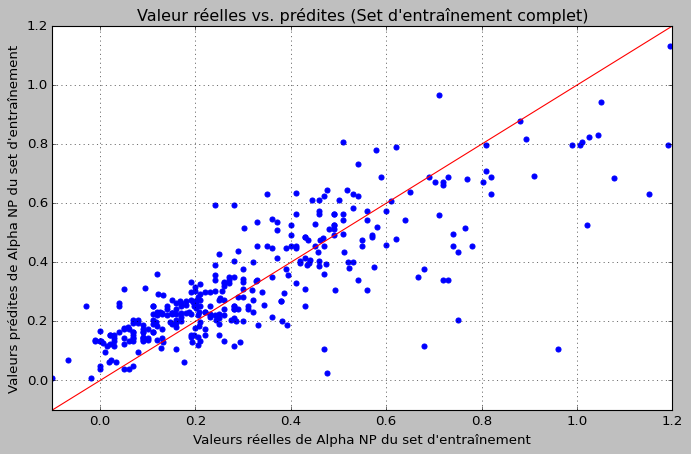

MSE finale du modèle Alpha NP = 0.0240


In [ ]:
#Modèle final de prédiction de Alpha NP sur les données d'entraînement
scaler_x_final1 = StandardScaler()
scaler_y_final1 = StandardScaler()

x_train_scaled1 = scaler_x_final1.fit_transform(x_train1)
y_train_scaled1 = scaler_y_final1.fit_transform(y_train1.reshape(-1,1)).flatten()

#Application du modèle final
final_model1 = best_model1
final_model1.fit(x_train_scaled1, y_train_scaled1)

y_train_pred_scaled_final1 = final_model1.predict(x_train_scaled1)
y_train_pred_final1 = scaler_y_final1.inverse_transform(y_train_pred_scaled_final1.reshape(-1,1)).flatten()

#Représentation graphique des prédictions sur l'intégralité du set d'entraînement
plt.figure(figsize=(10,6))
plt.scatter(y_train1, y_train_pred_final1, color='blue', s=20)
plt.xlim(-0.1, 1.2)
plt.ylim(-0.1, 1.2)
plt.plot([min(y_train1), max(y_train1)], [min(y_train1), max(y_train1)], color='red')
plt.title("Valeur réelles vs. prédites (Set d'entraînement complet)")
plt.xlabel("Valeurs réelles de Alpha NP du set d'entraînement")
plt.ylabel("Valeurs prédites de Alpha NP du set d'entraînement")
plt.grid(True)
plt.show()

#Affichage de la métrique d'optimisation (MSE) sur les données d'entraînement
final_mse1 = mean_squared_error(y_train1, y_train_pred_final1)
print(f"MSE finale du modèle Alpha NP = {final_mse1:.4f}")

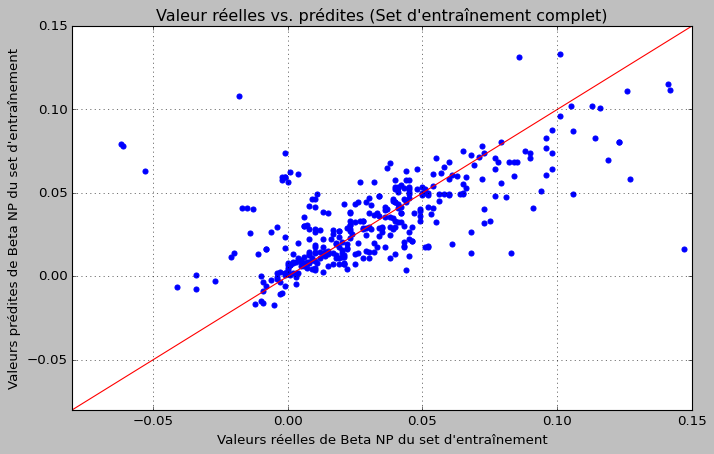

MSE finale du modèle Beta NP = 0.0014


In [ ]:
#Modèle final de prédiction de Beta NP sur les données d'entraînement

scaler_x_final2 = StandardScaler()
scaler_y_final2 = StandardScaler()

x_train_scaled2 = scaler_x_final2.fit_transform(x_train2)
y_train_scaled2 = scaler_y_final2.fit_transform(y_train2.reshape(-1,1)).flatten()

#Application du modèle final
final_model2 = best_model2
final_model2.fit(x_train_scaled2, y_train_scaled2)

y_train_pred_scaled_final2 = final_model2.predict(x_train_scaled2)
y_train_pred_final2 = scaler_y_final2.inverse_transform(y_train_pred_scaled_final2.reshape(-1,1)).flatten()

#Représentation graphique des prédictions sur l'intégralité du set d'entraînement
plt.figure(figsize=(10,6))
plt.scatter(y_train2, y_train_pred_final2, color='blue', s=20)
plt.xlim(-0.08, 0.15)
plt.ylim(-0.08, 0.15)
plt.plot([min(y_train2), max(y_train2)], [min(y_train2), max(y_train2)], color='red')
plt.title("Valeur réelles vs. prédites (Set d'entraînement complet)")
plt.xlabel("Valeurs réelles de Beta NP du set d'entraînement")
plt.ylabel("Valeurs prédites de Beta NP du set d'entraînement")
plt.grid(True)
plt.show()

#Affichage de la métrique d'optimisation (MSE) sur les données d'entraînement
final_mse2 = mean_squared_error(y_train2, y_train_pred_final2)
print(f"MSE finale du modèle Beta NP = {final_mse2:.4f}")

**Confrontation du modèle aux données test**

In [ ]:
#Evaluation du modèle de prédiction de Alpha NP
y_train_pred_scaled_final1 = final_model1.predict(x_train_scaled1)
y_train_pred_final1 = scaler_y_final1.inverse_transform(y_train_pred_scaled_final1.reshape(-1,1)).flatten()

train_mse_final1 = mean_squared_error(y_train1, y_train_pred_final1)

x_test_scaled1 = scaler_x_final1.fit_transform(x_test1)

y_test_pred_scaled_final1 = final_model1.predict(x_test_scaled1)
y_test_pred_final1 = scaler_y_final1.inverse_transform(y_test_pred_scaled_final1.reshape(-1,1)).flatten()

test_mse_final1 = mean_squared_error(y_test1, y_test_pred_final1)

test_predictions1 = y_test_pred_final1

#Comparaison des métriques d'entraînement et de test pour Alpha NP (évaluation de l'overfitting)
print(f"MSE Entraînement pour le modèle Alpha NP = {train_mse_final1:.4f}")
print(f"MSE Test pour le modèle Alpha NP = {test_mse_final1:.4f}")


#Evaluation du modèle de prédiction de Beta NP
y_train_pred_scaled_final2 = final_model2.predict(x_train_scaled2)
y_train_pred_final2 = scaler_y_final2.inverse_transform(y_train_pred_scaled_final2.reshape(-1,1)).flatten()

train_mse_final2 = mean_squared_error(y_train2, y_train_pred_final2)

x_test_scaled2 = scaler_x_final2.fit_transform(x_test2)

y_test_pred_scaled_final2 = final_model2.predict(x_test_scaled2)
y_test_pred_final2 = scaler_y_final2.inverse_transform(y_test_pred_scaled_final2.reshape(-1,1)).flatten()

test_mse_final2 = mean_squared_error(y_test2, y_test_pred_final2)

test_predictions2 = y_test_pred_final2

#Comparaison des métriques d'entraînement et de test pour Beta NP (évaluation de l'overfitting)
print(f"MSE Entraînement pour le modèle Beta NP = {train_mse_final2:.4f}")
print(f"MSE Test pour le modèle Beta NP = {test_mse_final2:.4f}")

MSE Entraînement pour le modèle Alpha NP = 0.0240
MSE Test pour le modèle Alpha NP = 0.0216
MSE Entraînement pour le modèle Beta NP = 0.0014
MSE Test pour le modèle Beta NP = 0.0012


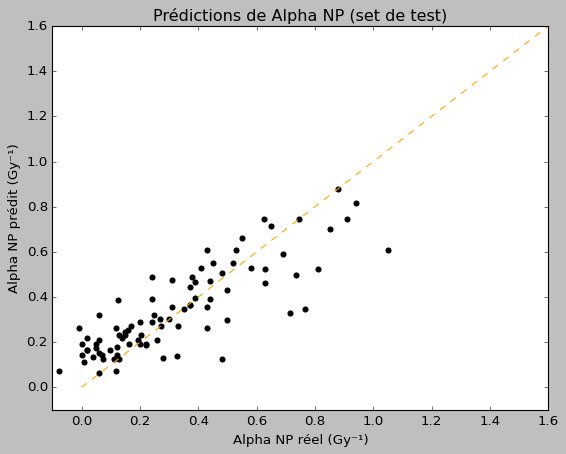

Coefficient de corrélation de Pearson : 0.8855
p-value : 4.813047575133826e-31


In [ ]:
#Prédiction sur le set de test (Alpha NP)
num_outputs1 = len(y_test1)
test_predictions1 = y_test_pred_final1

#Courbe de calibration
x_values1 = np.linspace(0,1.6,100)
y_values1 = x_values1

plt.scatter(y_test1,test_predictions1,marker='o',color="black")
plt.plot(x_values1, y_values1, linestyle='--', color='orange')
plt.xlim(-0.1, 1.6)
plt.ylim(-0.1, 1.6)
plt.xlabel("Alpha NP réel (Gy\u207B\u00B9)")
plt.ylabel("Alpha NP prédit (Gy\u207B\u00B9)")
plt.title("Prédictions de Alpha NP (set de test)")
plt.show()

#Coefficient de corrélation
pearson_corr, pearson_p_value = pearsonr(y_test1[:,0],test_predictions1)
print(f"Coefficient de corrélation de Pearson : {pearson_corr:.4f}")
print(f"p-value : {pearson_p_value}")

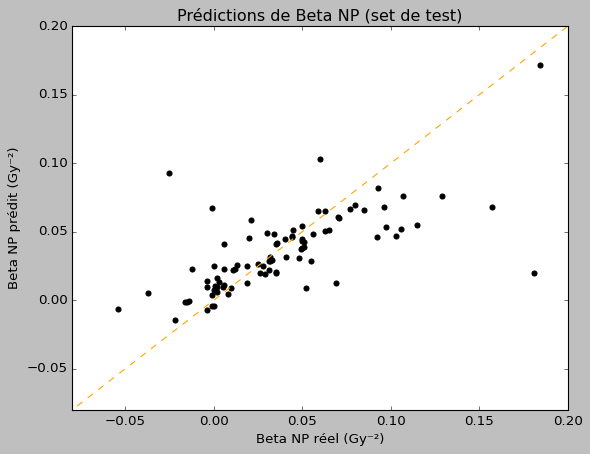

Coefficient de corrélation de Pearson : 0.6725
p-value : 3.93340296419449e-13


In [ ]:
#Prédiction sur le set de test (Beta NP)
num_outputs2 = len(y_test2)
test_predictions2 = y_test_pred_final2

#Courbe de calibration
x_values2 = np.linspace(-0.15,0.25,100)
y_values2 = x_values2

plt.scatter(y_test2,test_predictions2,marker='o',color="black")
plt.plot(x_values2, y_values2, linestyle='--', color='orange')
plt.xlabel("Beta NP réel (Gy\u207B\u00B2)")
plt.ylabel("Beta NP prédit (Gy\u207B\u00B2)")
plt.xlim(-0.08,0.2)
plt.ylim(-0.08,0.2)
plt.title("Prédictions de Beta NP (set de test)")
plt.show()

#Coefficient de corrélation
pearson_corr, pearson_p_value = pearsonr(y_test2[:,0],test_predictions2)
print(f"Coefficient de corrélation de Pearson : {pearson_corr:.4f}")
print(f"p-value : {pearson_p_value}")

**Interface d'utilisation de l'algorithme**

In [ ]:
#Création d'une boîte de dialogues
def get_input_features():
  features = []
  print("Please enter the values for the input features:")
  for name in feature_names_inbox:
    feature_value = float(input(f"{name}: "))
    features.append(feature_value)
  return features

#Liste des paramètres d'entrée
feature_names_inbox = [
    "Atomic number Z of the metallic nanoparticle",
    "Core diameter of the nanoparticle (nm)",
    "Nanoparticle solution concentration (mmol/L)",
    "Incubation time (h)",
    "Cell line category (Non-cancerous = 0 ; Very radioresistant = 1 ; Radioresistant = 2 ; Mildly radiosensistive = 3 ; Radiosensitive = 4 ; Very radiosensitive = 5)",
    "Oxygenation conditions (Normoxic = 2 ; Hypoxic = 1 ; Anoxic = 0)",
    "Nature of ionizing ray (X-ray = 1 ; Gamma-ray = 2 ; Electron = 3 ; Proton = 4 ; Helium ion = 5 ; Carbon ion = 6)",
    "Energy of ionizing ray (keV)",
    "Linear Energy Transfer (keV/um)",
    "Alpha Control (Gy-1)",
    "Beta Control (Gy-2)"
    ]

input_features = get_input_features()
print("Input features:", input_features)

#Récupération et stardardisation de l'intégralité des données
mean = x_data.mean()
std = x_data.std()
x_data_standardized = (x_data - mean) / std

#Mise en forme des données
y_data1 = np.ravel(y_data1)
y_data2 = np.ravel(y_data2)

#Standardisation des paramètres d'entrée customisées
means = np.mean(x_data, axis=0)
stds = np.std(x_data, axis=0)

manually_standardized_input_features = [(x - mean) / std for x, mean, std in zip (input_features, means, stds)]


#Application des modèles à l'intégralité des données
regression_model1 = final_model1.fit(x_data_standardized, y_data1)
regression_model2 = final_model2.fit(x_data_standardized, y_data2)

#Prédiction des grandeurs de sortie
predicted_alpha = regression_model1.predict([manually_standardized_input_features])
predicted_beta = regression_model2.predict([manually_standardized_input_features])

#Récupération des grandeurs de contrôle
Alpha_input = input_features[9]
Beta_input = input_features[10]

#Récupération des grandeurs prédites
Alpha_output = predicted_alpha[0]
Beta_output = predicted_beta[0]

#Extrapolation des métriques de sortie (DEF et SER)
Sref = 0.1
Dref = 2  #[Gy]

#SF Control à Dref
def Sctrl(Alpha_input, Beta_input, Dref):
  return np.exp(-Alpha_input * Dref - Beta_input * Dref**2)
Sctrl = Sctrl(Alpha_input, Beta_input, Dref)

#SF NP à Dref
def Snp(Alpha_output, Beta_output, Dref):
  return np.exp(-Alpha_output * Dref - Beta_output * Dref**2)
Snp = Snp(Alpha_output, Beta_output, Dref)

#Delta Control pour SFref
def Delta_ctrl(Alpha_input, Beta_input, Sref):
  return (Alpha_input**2 - 4 * Beta_input * np.log(Sref))
Delta_ctrl = Delta_ctrl(Alpha_input, Beta_input, Sref)

#Delta NP pour SFref
def Delta_np(Alpha_output, Beta_output, Sref):
  return (Alpha_output**2 - 4 * Beta_output * np.log(Sref))
Delta_np = Delta_np(Alpha_output, Beta_output, Sref)

#Dose Control pour SFref
def Dctrl(Alpha_input, Beta_input, Sref):
  return ((-Alpha_input + np.sqrt(Delta_ctrl))/(2 * Beta_input))
Dctrl = Dctrl(Alpha_input, Beta_input, Sref)

#Dose Control pour SFref
def Dnp(Alpha_output, Beta_output, Sref):
  return((-Alpha_output + np.sqrt(Delta_np))/(2 * Beta_output))
Dnp = Dnp(Alpha_output, Beta_output, Sref)

#Dose Enhancement Factor pour SFref
def DEF(Dctrl,Dnp):
  return Dctrl / Dnp
DEF = DEF(Dctrl,Dnp)

#Sensitizing Enhancement Ratio pour Dref
def SER(Sctrl,Snp):
  return 100 * ((Sctrl - Snp) / Sctrl)
SER = SER(Sctrl,Snp)

#Préparation du graphe du modèle linéaire-quadratique
a1 = Alpha_input
b1 = Beta_input
a2 = Alpha_output
b2 = Beta_output
D = np.linspace(0, 8, 1000)
SF1 = np.exp(-a1*D - b1*D**2)
SF2 = np.exp(-a2*D - b2*D**2)

#Présentation des résultats finaux
final_data = [Alpha_input, Beta_input, Alpha_output, Beta_output, Sctrl, Snp, Dctrl, Dnp, DEF, SER]
final_labels = ['Alpha Control (Gy-1)', 'Beta Control (Gy-2)', 'Alpha NP (Gy-1)', 'Beta NP (Gy-2)', 'SF Control', 'SF NP', 'D Control (Gy)', 'D NP (Gy)', 'DEF', 'SER (%)']
decimal_places = [2, 3, 2, 3, 3, 3, 2, 2, 2, 2]

formatted_data = [f"{value:.{dp}f}" for value, dp in zip(final_data, decimal_places)]

df = pd.DataFrame({'Quantity': final_labels, 'Value': formatted_data})

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
df_styled = df.style.set_properties(**{'text-align': 'center'})
df_styled = df_styled.applymap(lambda x: 'font-size: 14px')
df_styled

Please enter the values for the input features:
Atomic number Z of the metallic nanoparticle: 45
Core diameter of the nanoparticle (nm): 13
Nanoparticle solution concentration (mmol/L): 4.5
Incubation time (h): 24
Cell line category (Non-cancerous = 0 ; Very radioresistant = 1 ; Radioresistant = 2 ; Mildly radiosensistive = 3 ; Radiosensitive = 4 ; Very radiosensitive = 5): 3
Oxygenation conditions (Normoxic = 2 ; Hypoxic = 1 ; Anoxic = 0): 1
Nature of ionizing ray (X-ray = 1 ; Gamma-ray = 2 ; Electron = 3 ; Proton = 4 ; Helium ion = 5 ; Carbon ion = 6): 3
Energy of ionizing ray (keV): 6000
Linear Energy Transfer (keV/um): 0.2
Alpha Control (Gy-1): 0.26
Beta Control (Gy-2): 0.045
Input features: [45.0, 13.0, 4.5, 24.0, 3.0, 1.0, 3.0, 6000.0, 0.2, 0.26, 0.045]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
<ipython-input-31-c0806fc22162>:127: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  df_styled = df_styled.applymap(lambda x: 'font-size: 14px')


,Quantity,Value
0,Alpha Control (Gy-1),0.26
1,Beta Control (Gy-2),0.045
2,Alpha NP (Gy-1),0.37
3,Beta NP (Gy-2),0.077
4,SF Control,0.497
5,SF NP,0.348
6,D Control (Gy),4.83
7,D NP (Gy),3.55
8,DEF,1.36
9,SER (%),30.01


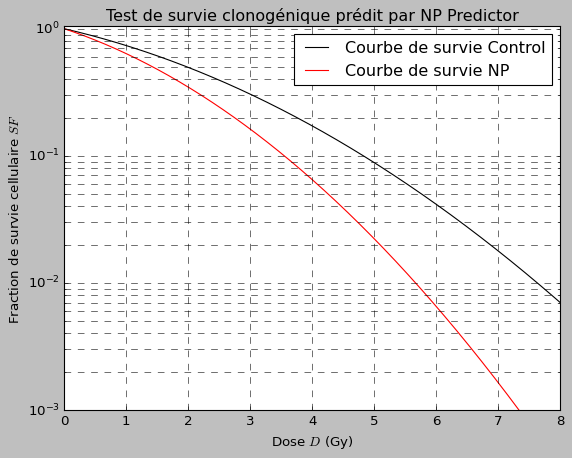

In [ ]:
#Resprésentation graphique des prédictions sur le modèle linéaire-quadratique
plt.plot(D, SF1, linestyle='-', color='black', label='Courbe de survie Control')
plt.plot(D, SF2, linestyle='-', color='r', label='Courbe de survie NP')
plt.grid(True, which="both", linestyle='--')

plt.gca().set_xlim(0, 8)
plt.gca().set_ylim(10**(-3), 1.05)
plt.yscale('log')
plt.title("Test de survie clonogénique prédit par NP Predictor")
plt.xlabel("Dose $D$ (Gy)")
plt.ylabel("Fraction de survie cellulaire $SF$")
plt.legend(loc="upper right")
plt.style.use('classic')
plt.show()